In [9]:
import pandas as pd
import numpy as np
from data import shape_data
from linear import LinearRegressor
from ridge import RidgeRegressor
from nonlinear import NLSModel
import matplotlib.pyplot as plt
import matplotlib.animation as anim

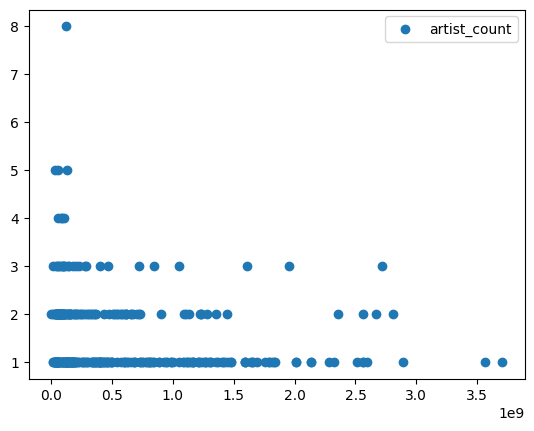

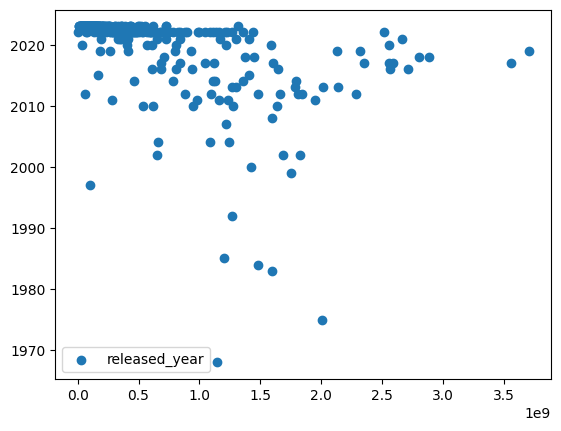

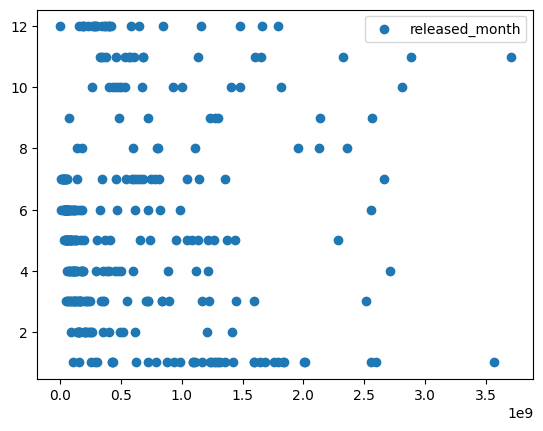

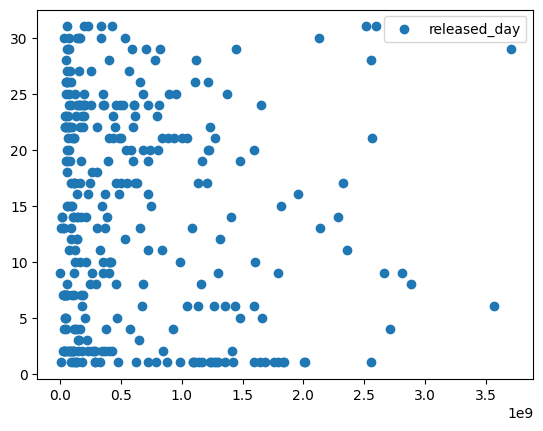

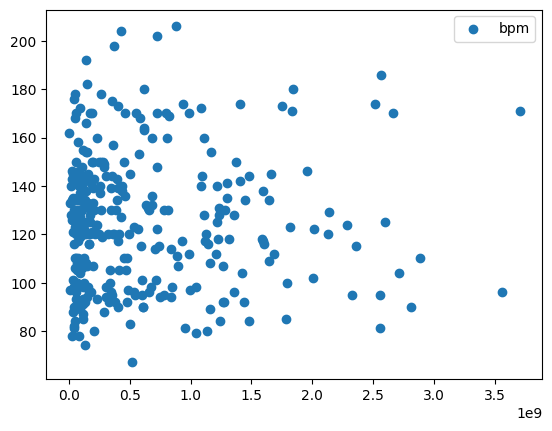

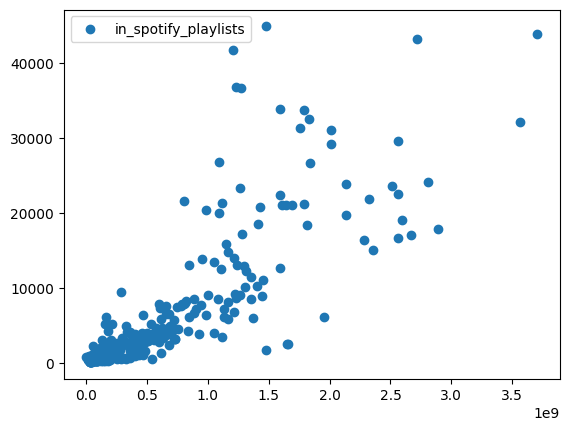

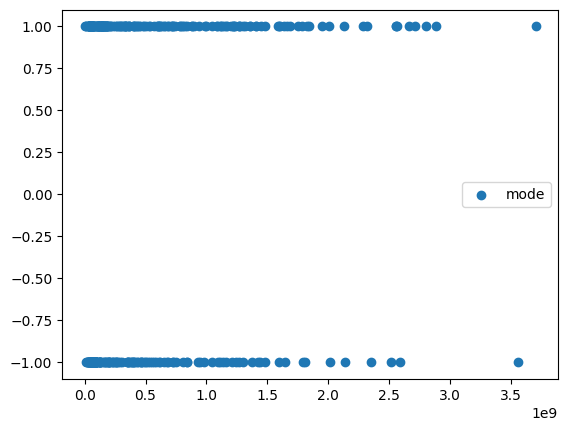

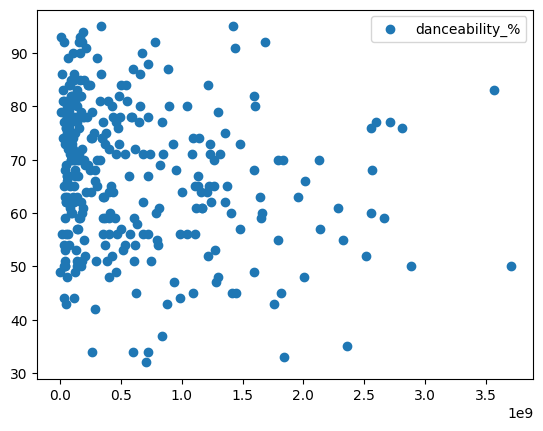

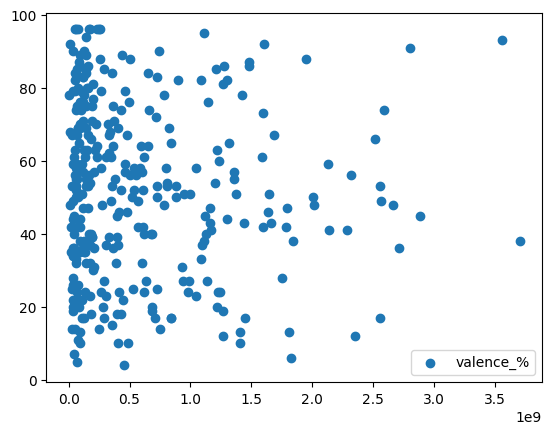

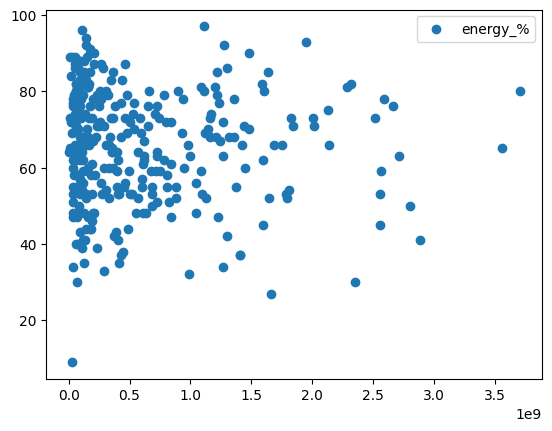

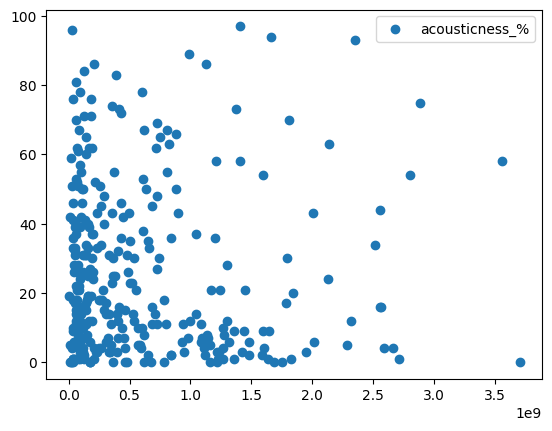

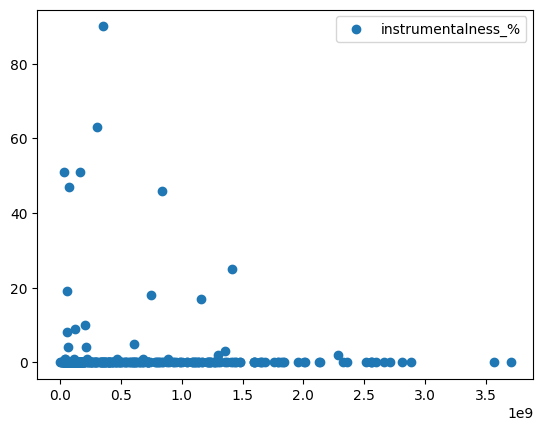

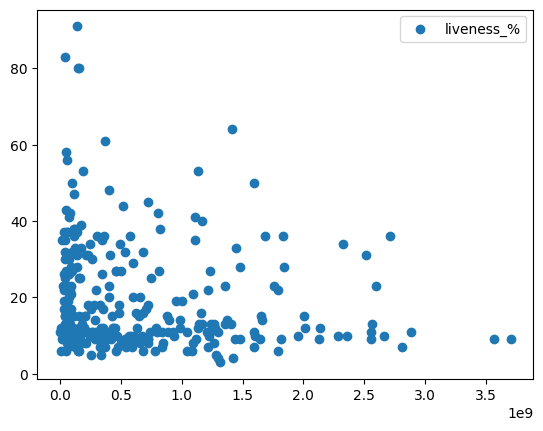

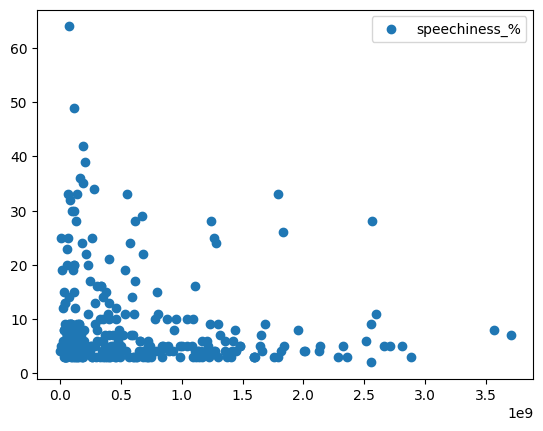

In [10]:
# retrieve the data
train, test, holdout = shape_data()

# convert train data to numpy
cols = [
    'artist_count',
    'released_year',
    'released_month',
    'released_day',
    'bpm',
    'in_spotify_playlists',
    'mode',
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
]

# plot the data to see what metrics actually fit
for col in cols:
    plt.scatter(y=col, x='streams', data=train)
    plt.legend()
    plt.show()



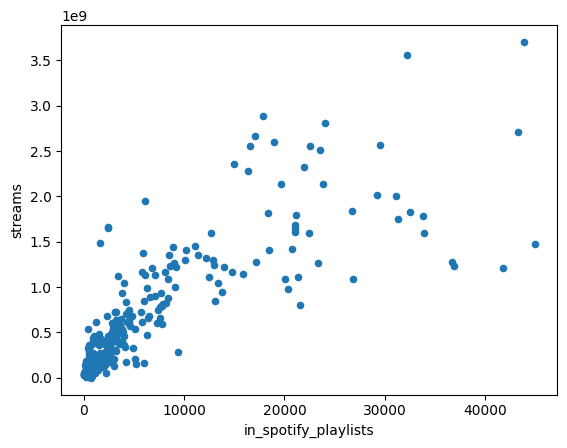

In [11]:
cols = ['in_spotify_playlists']
train.plot(kind='scatter', x='in_spotify_playlists', y='streams')
plt.show()

train_inputs = train[cols].to_numpy()
train_answer = train['in_spotify_playlists'].to_numpy()

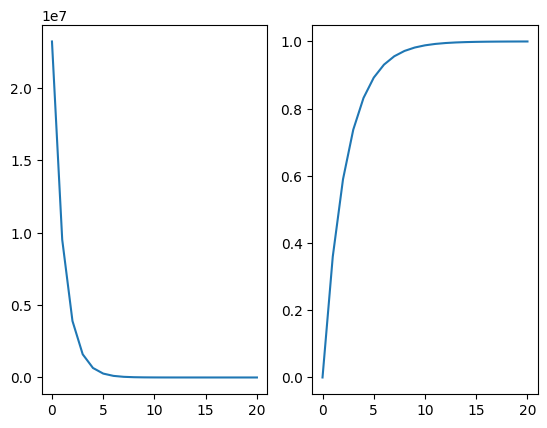

In [12]:
# linear model
model = LinearRegressor(0.00000000001, 1, 100)

scores, weights = model.fit(train_inputs, train_answer)

fig = plt.figure()
fig.add_subplot(121).plot(scores)
fig.add_subplot(122).plot(weights)
plt.show()

In [13]:
weights = model.weight_hist
print(weights)

[array([0.]), array([0.35960227]), array([0.58989075]), array([0.73736697]), array([0.8318104]), array([0.89229176]), array([0.93102389]), array([0.95582785]), array([0.97171226]), array([0.98188459]), array([0.98839893]), array([0.9925707]), array([0.99524229]), array([0.99695317]), array([0.99804882]), array([0.99875047]), array([0.9991998]), array([0.99948755]), array([0.99967183]), array([0.99978984]), array([0.99986541])]


In [20]:
# craft the regression model
model = NLSModel(0.0000000000000000000000000000000001, 1, 100, 1)

# fit the data
model.fit(train_inputs, train_answer)

KeyboardInterrupt: 

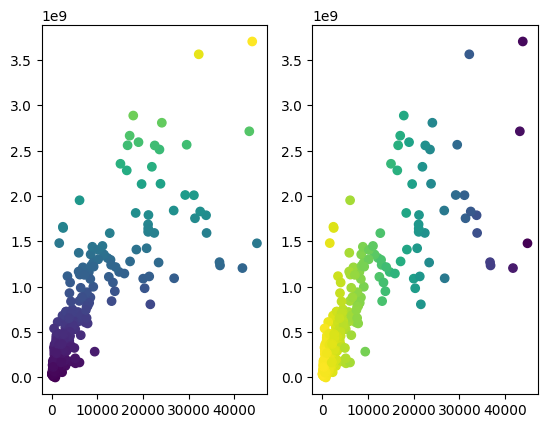

In [21]:
weights = model.weights
data = train[cols].to_numpy()
values = model.predict(weights, data)

fig = plt.figure()
fig.add_subplot(121).scatter(x='in_spotify_playlists', y='streams', c='streams', data=train)
fig.add_subplot(122).scatter(x='in_spotify_playlists', y='streams', data=train, c=values)

plt.show()

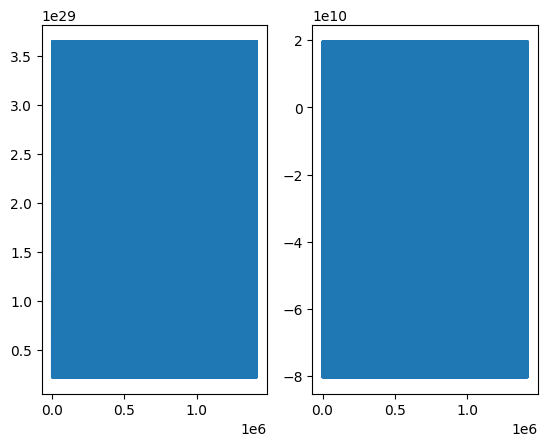

KeyboardInterrupt: 

In [22]:
fig = plt.figure()
fig.add_subplot(121).plot(model.get_scores())
fig.add_subplot(122).plot(model.get_weights())

plt.show()

print(model.get_scores())
print(model.get_weights())

In [24]:
model.get_weights()

array([ 4.52735917e-01,  1.96797407e+10, -8.03202593e+10, ...,
        1.96797407e+10, -8.03202593e+10,  1.96797407e+10])

In [ ]:
# craft the model...this is going to be a nonlinear least squares
model = RidgeRegressor(1)

# fit the data
score = model.fit(train_inputs, train_answer)

print(score)